<a href="https://colab.research.google.com/github/khajanawaz-6904/AIML-2025-B15/blob/main/lab%20exam%201971.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

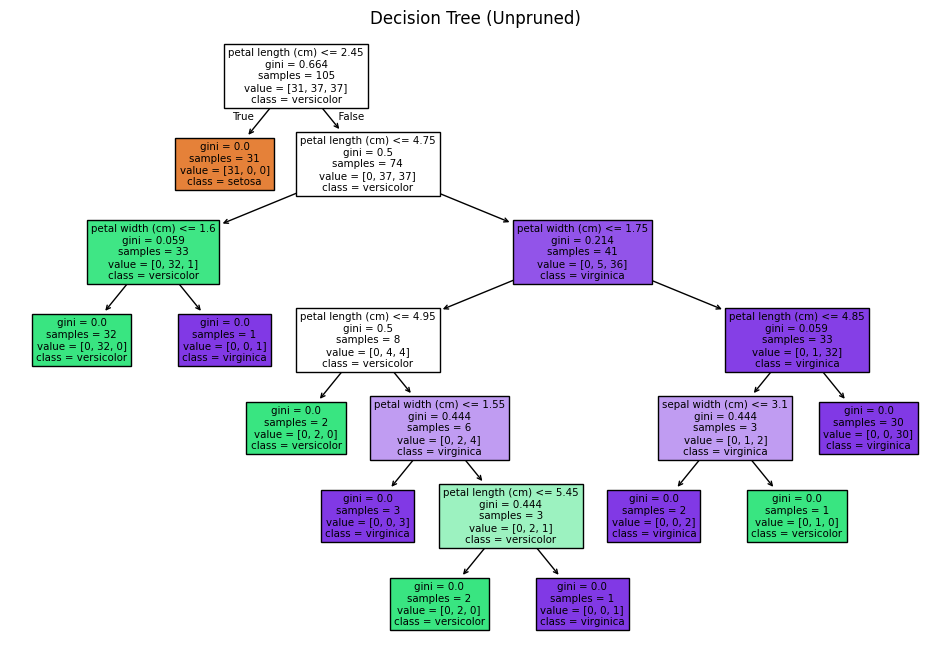

Accuracy of the Decision Tree (Unpruned): 1.0000


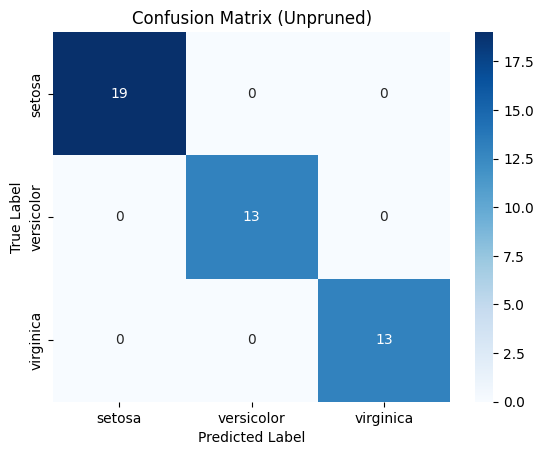

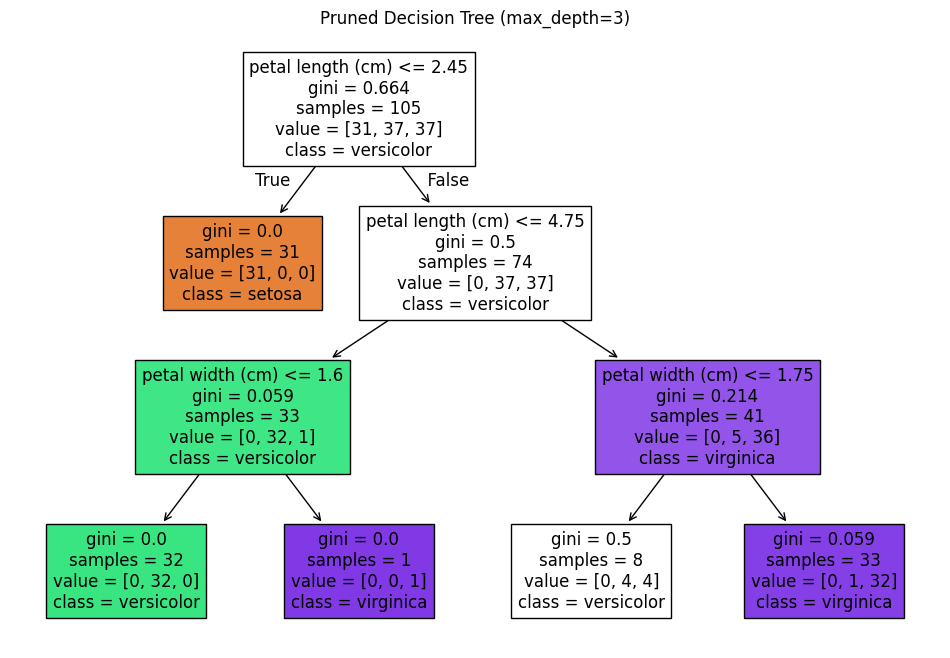

Accuracy of the Pruned Decision Tree (max_depth=3): 1.0000


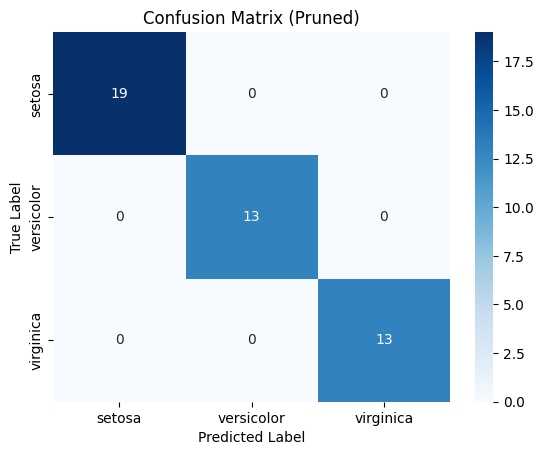


Feature Importance (Unpruned Decision Tree):
sepal length (cm): 0.0000
sepal width (cm): 0.0191
petal length (cm): 0.8933
petal width (cm): 0.0876

Feature Importance (Pruned Decision Tree):
sepal length (cm): 0.0000
sepal width (cm): 0.0000
petal length (cm): 0.9251
petal width (cm): 0.0749

Comparison of Accuracy:
Accuracy (Unpruned): 1.0000
Accuracy (Pruned): 1.0000


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=data.target_names, filled=True)
plt.title("Decision Tree (Unpruned)")
plt.show()

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree (Unpruned): {accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix (Unpruned)")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


clf_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_pruned.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(clf_pruned, feature_names=X.columns, class_names=data.target_names, filled=True)
plt.title("Pruned Decision Tree (max_depth=3)")
plt.show()

y_pred_pruned = clf_pruned.predict(X_test)

accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print(f"Accuracy of the Pruned Decision Tree (max_depth=3): {accuracy_pruned:.4f}")

conf_matrix_pruned = confusion_matrix(y_test, y_pred_pruned)
sns.heatmap(conf_matrix_pruned, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix (Pruned)")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nFeature Importance (Unpruned Decision Tree):")
for feature, importance in zip(X.columns, clf.feature_importances_):
    print(f"{feature}: {importance:.4f}")

print("\nFeature Importance (Pruned Decision Tree):")
for feature, importance in zip(X.columns, clf_pruned.feature_importances_):
    print(f"{feature}: {importance:.4f}")

print(f"\nComparison of Accuracy:")
print(f"Accuracy (Unpruned): {accuracy:.4f}")
print(f"Accuracy (Pruned): {accuracy_pruned:.4f}")